# Đọc dữ liệu và quan sát mẫu dữ liệu

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('final_data.csv')
df.head(2)

,watch_name,price,watch_type,user,watch_dia,glass_material,bracelet_material,waterproof,origin,watch_thickness,website,watch_shape
0,Đồng hồ Casio B650WC-5ADF - Đồng hồ Casio B650...,1.290.000đ,Pin (Quartz),Nam,25mm,Nhựa,Dây kim loại,10 ATM,Trung Quốc,NaN,Sendo,Mặt chữ nhật
1,Đồng hồ Casio B640WD-1AVDF - Đồng hồ Casio B64...,650.000đ,Pin (Quartz),Nam,38mm,Nhựa,Dây kim loại,10 ATM,Trung Quốc,NaN,Sendo,Mặt oval


In [2]:
# Kích thước bộ dữ liệu
df.shape

(3533, 12)

In [3]:
# Thông tin
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533 entries, 0 to 3532
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   watch_name         3533 non-null   object
 1   price              3533 non-null   object
 2   watch_type         3145 non-null   object
 3   user               3183 non-null   object
 4   watch_dia          3257 non-null   object
 5   glass_material     3456 non-null   object
 6   bracelet_material  3469 non-null   object
 7   waterproof         3405 non-null   object
 8   origin             3001 non-null   object
 9   watch_thickness    2052 non-null   object
 10  website            3533 non-null   object
 11  watch_shape        3187 non-null   object
dtypes: object(12)
memory usage: 331.3+ KB


# Kiểm tra giá trị khuyết

In [4]:
# Giá trị khuyết từng thuộc tính
df.isnull().sum()

watch_name              0
price                   0
watch_type            388
user                  350
watch_dia             276
glass_material         77
bracelet_material      64
waterproof            128
origin                532
watch_thickness      1481
website                 0
watch_shape           346
dtype: int64

In [5]:
# Tổng giá trị khuyết
print('Tổng cộng có', df.isnull().sum().sum(), 'giá trị bị khuyết')

Tổng cộng có 3642 giá trị bị khuyết


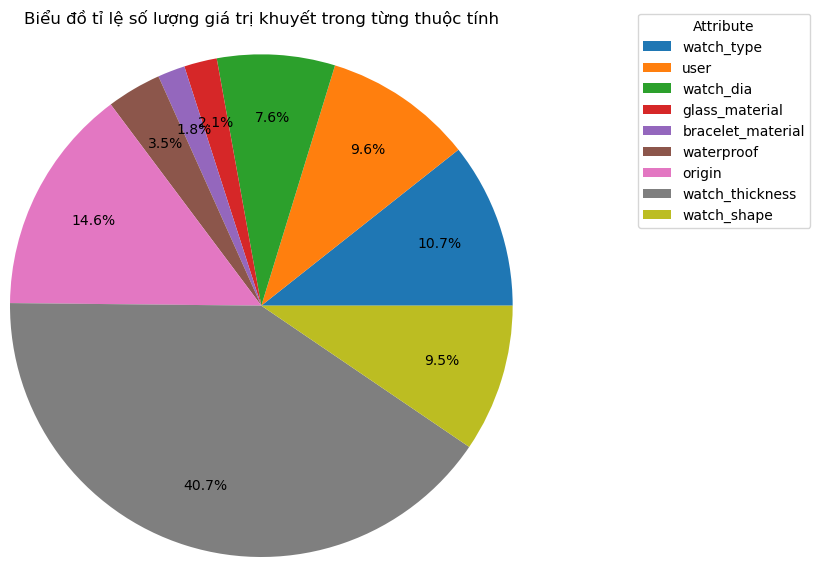

In [6]:
# Biểu đồ tỉ lệ số lượng giá trị khuyết trong từng thuộc tính
import matplotlib.pyplot as plt
import seaborn as sns

miss_df = df.isnull().sum().to_frame()
miss_df = miss_df[miss_df[0] > 0]

plt.title('Biểu đồ tỉ lệ số lượng giá trị khuyết trong từng thuộc tính', pad=70);
plt.pie(x=miss_df[0], labels=[None]*len(miss_df[0]), pctdistance=0.75, radius=1.7, autopct='%.1f%%')
plt.legend(title = 'Attribute', labels=miss_df.index, loc='center left', bbox_to_anchor=(1.5, 1))
plt.show()

# Định dạng dữ liệu các thuộc tính

## Nhóm 1: Chuẩn hóa/cập nhật kiểu dữ liệu các biến

### Đường kính mặt kính 'watch_dia'

In [7]:
df.watch_dia.value_counts()

40mm       218
42mm       130
41mm       119
43mm       117
38mm        94
          ... 
25.1 mm      1
39.8mm       1
47.2mm       1
50.6mm       1
56.7mm       1
Name: watch_dia, Length: 220, dtype: int64

In [8]:
import re

watch_dia_values = []
for value in df.watch_dia:
    match = re.search(r'(\d+(\.\d*)?|\.\d+|\d+,\d+)', str(value).replace(',', '.'))
    if match:
        watch_dia_values.append(float(match.group()))
    else:
        watch_dia_values.append(np.nan)

df.watch_dia = watch_dia_values
df.watch_dia = df.watch_dia.astype(float)

### Độ dày 'watch_thickness'

In [9]:
df.watch_thickness.value_counts()

7.5mm      85
8mm        68
8.5mm      58
8.7mm      51
15.8mm     50
           ..
11.4 mm     1
15.7 mm     1
7.4 mm      1
11.9 mm     1
12.2mm      1
Name: watch_thickness, Length: 160, dtype: int64

In [10]:
watch_thickness_values = []
for value in df.watch_thickness:
    match = re.search(r'(\d+(\.\d*)?|\.\d+|\d+,\d+)', str(value).replace(',', '.'))
    if match:
        watch_thickness_values.append(float(match.group()))
    else:
        watch_thickness_values.append(np.nan)

df.watch_thickness = watch_thickness_values
df.watch_thickness = df.watch_thickness.astype(float)

### Độ kháng nước 'waterproof'

In [11]:
df.waterproof.value_counts()

20atm                      725
10atm                      694
3atm                       643
5atm                       568
5 ATM                      181
3 ATM - Rửa tay, đi mưa    137
10 ATM                     134
5 ATM - Đi mưa, tắm         84
3 ATM                       76
20 ATM                      74
10 ATM - Tắm, bơi           53
1 ATM - Rửa tay             25
Không chống nước             6
Khác                         3
20 ATM - Bơi, lặn            1
30atm                        1
Name: waterproof, dtype: int64

In [12]:
waterproof_values = []
for value in df.waterproof:
  if value == 'Không chống nước':
        waterproof_values.append(0)
  elif value == 'Khác':
        waterproof_values.append(np.nan)
  else:
    match = re.search(r'\d+', str(value))
    if match:
        waterproof_values.append(int(match.group()))
    else:
        waterproof_values.append(np.nan)

df.waterproof = waterproof_values
df.waterproof = df.waterproof.astype(float)

### Giá đồng hồ 'price'

In [13]:
price_values = []
for price in df.price:
    matches = re.findall(r'\d[\d\.,]*', price)
    if matches:
        price_number = matches[0]
        # Loại bỏ cả dấu phẩy và dấu chấm
        price_number = price_number.replace(',', '').replace('.', '')
        price_values.append(price_number)
    else:
        price_values.append(np.nan)
        
df.price = price_values
df.price = df.price.astype(float)

## Nhóm 2: Ánh xạ thủ công các biến có giá trị không nhất quán

In [14]:
import seaborn as sns
import matplotlib as mpl

def Visualize_Map_Col(df, replace_map, col, colr=True):  
    # Định dạng dữ liệu
    old = df[col].dropna(axis=0)
    old_counts = old.value_counts()
    df[col].replace(to_replace=replace_map, inplace=True)
    new = df[col].dropna(axis=0)
    new_counts = new.value_counts()

    labels = set(old.unique()).union(set(new.unique()))
    # labels = sorted(set(old.unique()) | )

    old_counts = [old_counts.get(label, 0) for label in labels]
    new_counts = [new_counts.get(label, 0) for label in labels]

    # Trực quan hóa
    plt.figure(figsize=(10, 5))
    if colr == True:
        colors = plt.cm.Paired(range(2*len(labels)))
    else:
        colors = None
    sns.color_palette("pastel")

    plt.subplot(1, 2, 1)
    plt.pie(old_counts, autopct=lambda p: '{:.1f}%'.format(p) if p > 5 else '', startangle=90, colors=colors)
    plt.title('Trước khi định dạng')

    plt.subplot(1, 2, 2)
    plt.pie(new_counts, autopct=lambda p: '{:.1f}%'.format(p) if p > 5 else '', startangle=90, colors=colors)
    plt.title('Sau khi định dạng')

    plt.legend(title = 'Value', labels=labels, loc='center left', bbox_to_anchor=(1, 1))
    plt.show();

### Dòng máy 'watch_type'

In [15]:
df.watch_type.value_counts()

Pin/Quartz                         1870
Điện Tử                             523
Pin (Quartz)                        430
Năng Lượng Mặt Trời                 225
Năng lượng mặt trời                  35
Pin/Quartz, Điện Tử                  28
Điện Tử, Pin/Quartz                  25
Cơ (Automatic)                        5
Eco Drive                             2
Điện Tử, Năng Lượng Mặt Trời          1
Pin/Quartz, Năng Lượng Mặt Trời       1
Name: watch_type, dtype: int64

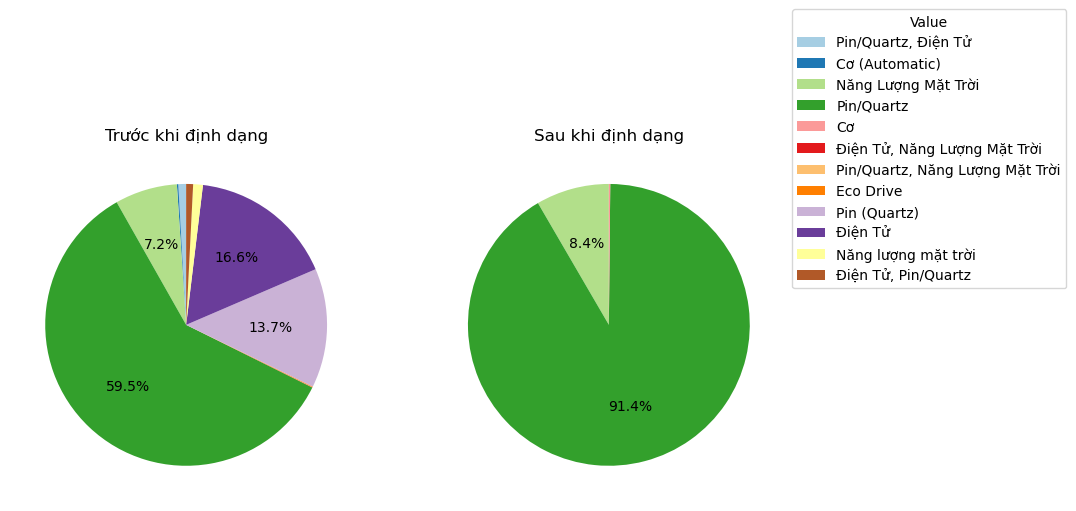

In [16]:
watch_type_map = {
    # Pin/Quartz
    'Pin (Quartz)' : 'Pin/Quartz',
    'Điện Tử, Pin/Quartz' : 'Pin/Quartz',
    'Điện Tử' : 'Pin/Quartz',
    'Pin/Quartz, Điện Tử' : 'Pin/Quartz',
    
    # Năng Lượng Mặt Trời
    'Eco Drive' : 'Năng Lượng Mặt Trời',
    'Năng lượng mặt trời' : 'Năng Lượng Mặt Trời',
    'Năng Lượng Mặt Trời, Điện Tử' : 'Năng Lượng Mặt Trời',
    'Điện Tử, Năng Lượng Mặt Trời' : 'Năng Lượng Mặt Trời',
    'Pin/Quartz, Năng Lượng Mặt Trời' : 'Năng Lượng Mặt Trời',

    # Cơ
    'Cơ (Automatic)' : 'Cơ'
}

Visualize_Map_Col(df, watch_type_map, 'watch_type')

### Chất liệu dây đeo 'bracelet_material'

In [17]:
df.bracelet_material.value_counts()

Dây Nhựa              1102
Dây Kim Loại           922
Dây Da                 375
Dây kim loại           214
Dây nhựa               155
Dây Cao Su             143
Hợp kim                108
Dây da                  95
Da tổng hợp             80
Nhựa                    78
Dây Thép Không Gỉ       63
Dây Dù/Vải              42
Dây cao su              37
Thép không gỉ           27
Dây vải                  9
Nhựa phối kim loại       8
Cao su                   4
Nhôm                     3
Silicon                  2
Khác                     1
Dây Titanium             1
Name: bracelet_material, dtype: int64

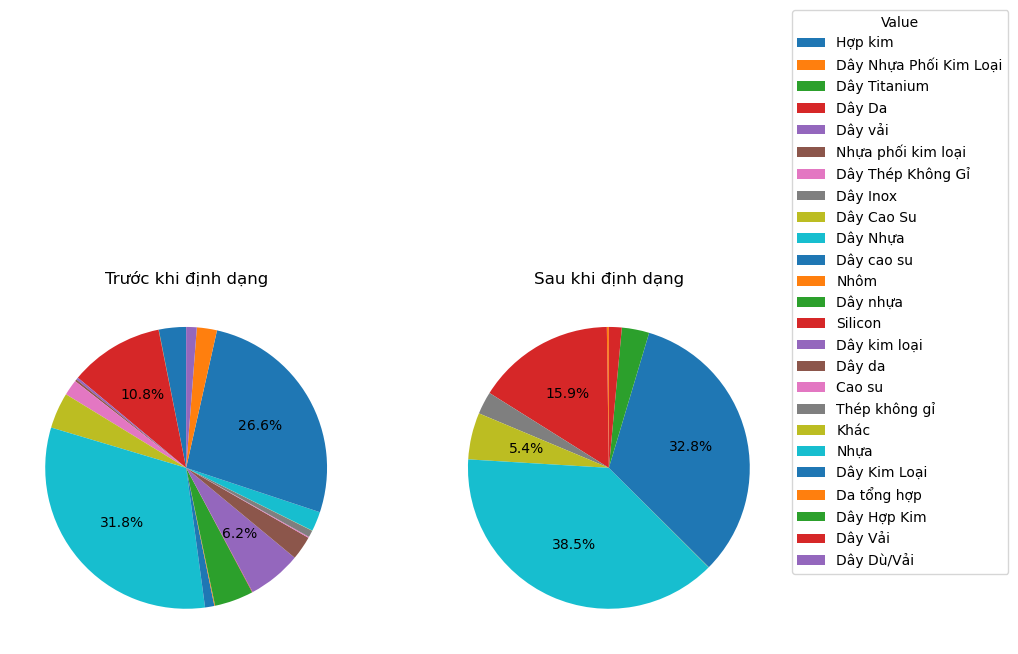

In [18]:
bracelet_material_map = {
    # Dây Kim Loại
    'Dây kim loại' : 'Dây Kim Loại',
    'Nhôm' : 'Dây Kim Loại',

    # Dây Cao Su
    'Silicon' : 'Dây Cao Su',
    'Dây cao su' : 'Dây Cao Su',
    'Cao su' : 'Dây Cao Su',

    # Dây Nhựa
    'Dây nhựa' : 'Dây Nhựa',
    'Nhựa' : 'Dây Nhựa',

    # Dây Da
    'Dây da' : 'Dây Da',
    'Da tổng hợp' : 'Dây Da',

    # Dây Hợp Kim*
    'Hợp kim' : 'Dây Hợp Kim',
    'Dây Titanium': 'Dây Hợp Kim',

    # Dây Inox - Thép Không Gỉ*
    'Thép không gỉ' : 'Dây Inox',
    'Dây Thép Không Gỉ' : 'Dây Inox',

    # Dây Nhựa Phối Kim Loại*
    'Nhựa phối kim loại' : 'Dây Nhựa Phối Kim Loại',

    # Dây Vải*
    'Dây vải' : 'Dây Vải',
    'Dây Dù/Vải' : 'Dây Vải',
    
    # Khác 
}

Visualize_Map_Col(df, bracelet_material_map, 'bracelet_material', False)

### Chất liệu mặt kính 'glass_material'

In [19]:
df.glass_material.value_counts()

Kính Khoáng            2083
Kính Nhựa               446
Kính cứng               338
Kính khoáng Mineral     199
Kính Sapphire           185
Nhựa                    176
Nhựa Resin               22
Khác                      4
Kính Cong                 3
Name: glass_material, dtype: int64

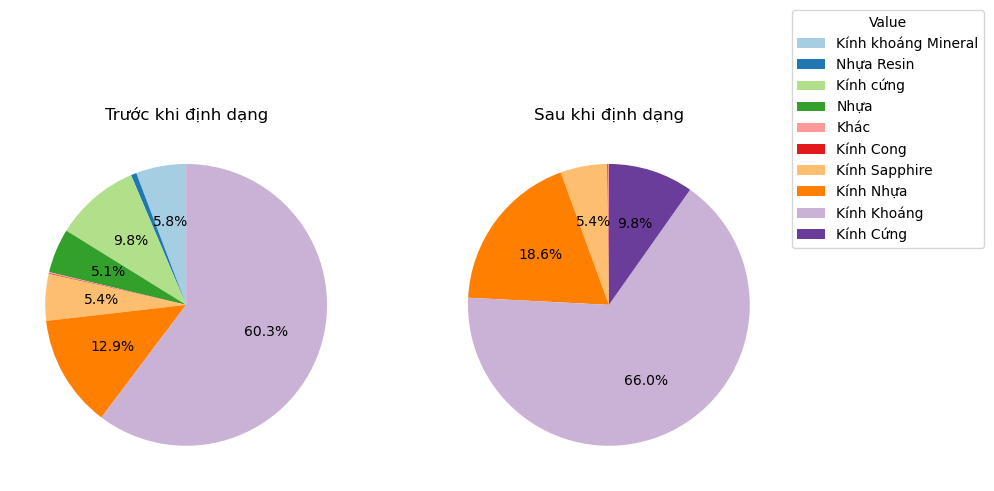

In [20]:
glass_material_map = {
    # Kính Khoáng
    'Kính khoáng Mineral' : 'Kính Khoáng',

    # Kính Nhựa
    'Nhựa Resin' : 'Kính Nhựa',
    'Nhựa' : 'Kính Nhựa',

    # Kính Cứng
    'Kính cứng' : 'Kính Cứng'

    # Kính Sapphire
    
    # Kính Cong

    # Khác  
}

Visualize_Map_Col(df, glass_material_map, 'glass_material')

### Xuất xứ 'origin'

In [21]:
df.origin.value_counts()

Đồng hồ Nhật Bản    2519
Nhật                 386
Trung Quốc            49
Mỹ                    13
Châu Á                13
Hồng Kông             11
Hàn Quốc               8
Châu Âu                1
Đài Loan               1
Name: origin, dtype: int64

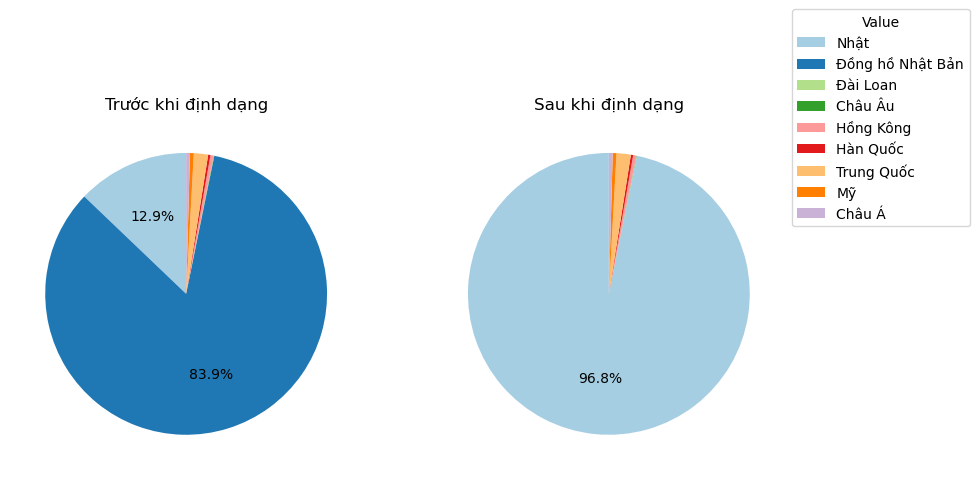

In [22]:
origin_map = {
    'Đồng hồ Nhật Bản' : 'Nhật'
}

Visualize_Map_Col(df, origin_map, 'origin')

In [23]:
df.origin.value_counts()

Nhật          2905
Trung Quốc      49
Mỹ              13
Châu Á          13
Hồng Kông       11
Hàn Quốc         8
Châu Âu          1
Đài Loan         1
Name: origin, dtype: int64

## Nhóm 3: Khác

### Tên đồng hồ 'watch_name'

In [24]:
names = df.watch_name

# Biểu thức chính quy để trích xuất SKU/UPC/MPN
pattern1 = re.compile(r'\b(\w{1,}-\w{1,}-\w{1,})\b')
pattern2 = re.compile(r'\b(\w{1,}-\w{1,})\b')
pattern3 = re.compile(r'\b([^\s]+)\b$')

# Hàm để lấy SKU/UPC/MPN (mã sản phẩm/số sản phẩm/nhà sản xuất) từ tên sản phẩm
# Đặt giá trị NaN cho các đồng hồ không phải của Casio
def extract_sku_upc_mpn(name):
    if 'casio' not in name.lower():
      return np.nan
    match1 = pattern1.search(name)
    match2 = pattern2.search(name)
    match3 = pattern3.search(name)
    if match1:
      return match1.group(1).upper()
    elif match2:
      return match2.group(1).upper()
    elif match3:
      return match3.group(1).upper()
    else:
      return np.nan

# Áp dụng hàm cho mỗi tên đồng hồ trong danh sách
df.watch_name = [extract_sku_upc_mpn(name) for name in names]

# Loại bỏ các đồng hồ không phải của Casio
df.dropna(subset=['watch_name'], axis=0, inplace=True)

### Tạo thuộc tính Mã đồng hồ 'watch_sku' từ 'watch_name'

In [25]:
# Biểu thức chính quy để trích xuất SKU
pattern = re.compile(r'([A-Z]+)-?[0-9A-Z]*')

# Hàm để lấy SKU từ SKU/UPC/MPN
def extract_sku(name):
    match = pattern.search(name)
    return match.group(1) if match else None

# Áp dụng hàm cho mỗi tên đồng hồ trong danh sách
df['watch_sku'] = [extract_sku(name) for name in df.watch_name]

In [26]:
# Sửa lại tên cho các đồng hồ
# df.watch_name = 'Đồng hồ Casio ' + df.watch_name

In [27]:
df.watch_sku.value_counts()

MTP        730
LTP        521
GA         189
DW         110
BGA        102
          ... 
SGW          1
ERA          1
SHB          1
CASIOLQ      1
HDA          1
Name: watch_sku, Length: 109, dtype: int64

### Đối tượng sử dụng 'user'

In [28]:
df.user.value_counts()

Nam       1955
Nữ         932
Unisex     213
Trẻ em       2
Name: user, dtype: int64

### Hình dạng kính 'watch_shape'

In [29]:
df.watch_shape.value_counts()

Mặt tròn        2378
Mặt vuông        383
Mặt chữ nhật     216
Bát giác         101
Lục giác          10
Mặt oval           8
Đa giác            3
Name: watch_shape, dtype: int64

## Kết quả

In [30]:
num_cols = df.select_dtypes(['int', 'float']).columns.tolist()
cat_cols = df.select_dtypes(['object']).columns.tolist()

print(f'Có {len(num_cols)} biến số, bao gồm: {num_cols}')
print(f'Có {len(cat_cols)} biến số, bao gồm: {cat_cols}')

Có 4 biến số, bao gồm: ['price', 'watch_dia', 'waterproof', 'watch_thickness']
Có 9 biến số, bao gồm: ['watch_name', 'watch_type', 'user', 'glass_material', 'bracelet_material', 'origin', 'website', 'watch_shape', 'watch_sku']


# Xử lí giá trị khuyết và giá trị trùng lặp

## Xử lí giá trị khuyết

In [31]:
# Số giá trị khuyết của từng thuộc tính
df.isnull().sum()

watch_name              0
price                   0
watch_type            380
user                  342
watch_dia             267
glass_material         67
bracelet_material      64
waterproof            120
origin                525
watch_thickness      1396
website                 0
watch_shape           345
watch_sku               0
dtype: int64

In [32]:
# Số giá trị khuyết của từng mẫu dữ liệu
df.isnull().sum(axis=1).value_counts()

0    1622
1    1148
4     317
2     239
6      44
5      38
3      25
7       8
9       3
dtype: int64

In [33]:
# Chỉ giữ lại các mẫu dữ liệu có ít hơn 5 thuộc tính NaN
df = df[df.isnull().sum(axis=1) < 5]

Các đồng hồ có chung mã đồng hồ 'watch_sku' thường có chung một số đặc trưng cụ thể. Vì thế nên sẽ điền giá trị khuyết theo từng mã đồng hồ 'watch_sku'.
* Các biến phân loại: giá trị phổ biến nhất (mode)
* Các biến số: giá trị trung bình (mean)

In [34]:
# Hàm điền giá trị khuyết các biến phân loại
def fill_na_category(column):
    mode_by_category = df[column].groupby(df['watch_sku']).apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    df[column].fillna(df['watch_sku'].map(mode_by_category), inplace=True)

# Hàm điền giá trị khuyết các biến số
def fill_na_numeric(column):
    mode_by_numeric = df[column].groupby(df['watch_sku']).apply(lambda x: x.mean())
    df[column].fillna(df['watch_sku'].map(mode_by_numeric), inplace=True)


# Áp dụng hàm cho mỗi cột trong DataFrame
for col in df.columns:
    if col != 'watch_sku' and col in cat_cols:
        fill_na_category(col)
    if col in num_cols:
        fill_na_numeric(col)

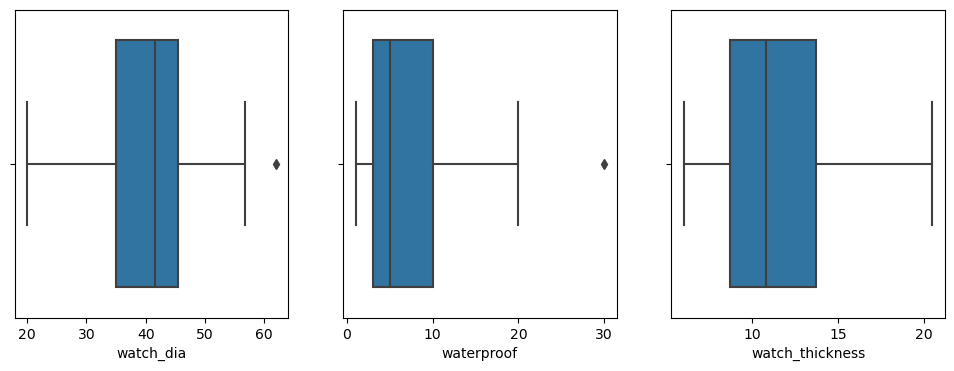

In [35]:
# Biểu đồ Boxplot
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i, col in enumerate([x for x in num_cols if x!='price']):
    sns.boxplot(data=df, x=col, ax=ax[i])
plt.show();

In [36]:
# Biến số 'watch_thickness' và 'watch_dia' không có nhiều outlier nên chọn điền bằng giá trị trung bình
df['watch_thickness'].fillna(df['watch_thickness'].mean(), inplace=True)
df['watch_dia'].fillna(df['watch_dia'].mean(), inplace=True)

# Biến số 'waterproof' là giá trị rời rạc nên sẽ chọn điền bằng giá trị phổ biến
df['waterproof'].fillna(df['waterproof'].mode()[0], inplace=True)

# Casio là thương hiệu đồng hồ của Nhật Bản, nên phần lớn các đồng hồ sẽ của Nhật
df['origin'].fillna('Nhật', inplace=True)

In [37]:
df.isnull().sum()

watch_name           0
price                0
watch_type           0
user                 1
watch_dia            0
glass_material       0
bracelet_material    6
waterproof           0
origin               0
watch_thickness      0
website              0
watch_shape          0
watch_sku            0
dtype: int64

In [38]:
# Quan sát các mẫu dữ liệu chứa giá trị khuyết của biến 'bracelet_material'
df[df.bracelet_material.isnull()]

,watch_name,price,watch_type,user,watch_dia,glass_material,bracelet_material,waterproof,origin,watch_thickness,website,watch_shape,watch_sku
3016,ID-15S-5DF,1410000.0,Pin/Quartz,Unisex,40.267402,Kính Nhựa,NaN,10.0,Nhật,11.284427,WatchStore,Mặt vuông,ID
3106,ID-15SA-5DF,1880000.0,Pin/Quartz,Unisex,40.267402,Kính Nhựa,NaN,10.0,Nhật,11.284427,WatchStore,Mặt vuông,ID
3153,ID-15S-5DF,1410000.0,Pin/Quartz,Unisex,40.267402,Kính Nhựa,NaN,10.0,Nhật,11.284427,WatchStore,Mặt vuông,ID
3174,ID-11S-1DF,1240000.0,Pin/Quartz,Unisex,40.267402,Kính Nhựa,NaN,10.0,Nhật,11.284427,WatchStore,Mặt vuông,ID
3400,ID-15S-5DF,1410000.0,Pin/Quartz,Unisex,40.267402,Kính Nhựa,NaN,10.0,Nhật,11.284427,WatchStore,Mặt vuông,ID
3421,TQ-140-1BDF,370000.0,Pin/Quartz,NaN,56.700000,Kính Nhựa,NaN,10.0,Nhật,11.284427,WatchStore,Mặt vuông,TQ


In [39]:
# Loại bỏ các mẫu chứa giá trị khuyết
df = df[~df.bracelet_material.isnull()]

In [40]:
# Số giá trị khuyết sau khi xử lí
df.isnull().sum().sum()

0

## Xử lí giá trị trùng lặp

Các đồng hồ
* 1. Trùng thông số, trùng website, trùng giá tiền: Loại bỏ trùng lặp, giữ bộ đầu tiên
* 2. Trùng thông số, trùng website, khác giá tiền: Cập nhật giá trị trung bình cho giá đồng hồ 'price'
* 3. Trùng thông số, khác website: Giữ nguyên

Các đồng hồ trùng thông số, website, giá tiền

In [41]:
# Kiểm tra xem có hàng nào bị trùng lặp không và nếu có thì chỉ giữ lại bộ đầu tiên
if df.duplicated().any() == True:
  before = df.shape[0]
  df.drop_duplicates(keep = "first", inplace = True)
  after = df.shape[0]
  print(f'Đã loại bỏ {before-after} hàng trùng lặp')
else:
  print("Không có hàng nào bị trùng lặp")

Đã loại bỏ 870 hàng trùng lặp


Các đồng hồ trùng thông số, website, khác giá tiền

In [42]:
# Danh sách các thuộc thông số đồng hồ
cols = [
 'watch_name',
 'watch_type',
 'user',
 'watch_dia',
 'glass_material',
 'bracelet_material',
 'waterproof',
 'origin',
 'watch_thickness',
 'watch_shape',
 'watch_sku']

# Nhóm các đồng hồ theo thông số và website
gr = df.groupby(cols+['website'])

# Cập nhật giá trị trung bình
df['price'] = gr['price'].transform('mean')

# Loại bỏ trùng lặp một lần nữa
df.drop_duplicates(keep = "first", inplace = True)

Các đồng hồ trùng thông số, khác website

In [43]:
# Danh sách các đồng hồ trùng nhau, khác website
df_web = df[df.duplicated(subset=cols, keep=False)].sort_values(by='watch_name').reset_index(drop=True)
df_web.head(4)

,watch_name,price,watch_type,user,watch_dia,glass_material,bracelet_material,waterproof,origin,watch_thickness,website,watch_shape,watch_sku
0,LRW-200H-4B2VDF,684000.0,Pin/Quartz,Nữ,34.0,Kính Nhựa,Dây Nhựa,10.0,Nhật,11.5,Thegioididong,Mặt tròn,LRW
1,LRW-200H-4B2VDF,640000.0,Pin/Quartz,Nữ,34.0,Kính Nhựa,Dây Nhựa,10.0,Nhật,11.5,WatchStore,Mặt tròn,LRW
2,LRW-200H-7E2VDF,640000.0,Pin/Quartz,Nữ,34.0,Kính Nhựa,Dây Nhựa,10.0,Nhật,11.5,WatchStore,Mặt tròn,LRW
3,LRW-200H-7E2VDF,513000.0,Pin/Quartz,Nữ,34.0,Kính Nhựa,Dây Nhựa,10.0,Nhật,11.5,Thegioididong,Mặt tròn,LRW


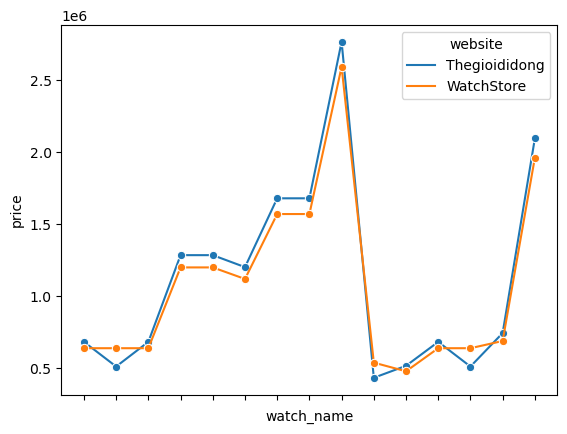

In [44]:
sns.lineplot(data=df_web, x='watch_name', y='price', hue='website', marker='o').set_xticklabels([]);

# Phân tích thăm dò

## Biến số

### Độ ảnh hưởng các biến số

In [45]:
from scipy.stats import pearsonr

# Ham tinh do anh huong cac bien so den bien target
def DoAnhHuongCacBienSo(df, target):
    num_cols = list(df.select_dtypes(['int', 'float']).columns)

    p_value = [0]*len(num_cols)
    pearsonr_corr = [0]*len(num_cols)
    check = [False]*len(num_cols) #  List kết quả biến số có ảnh hưởng đến biến target hay không (True/False)

    for i, col in enumerate(num_cols):
        pearsonr_corr[i], p_value[i] = pearsonr(df[col], df[target])
        if (p_value[i] < 0.05):
            check[i] = True


    df_res = pd.DataFrame({
        "Attribute": num_cols,
        "Pearsonr": pearsonr_corr,
        "P-value": p_value,
        "Result": check
    })

    df_res = df_res[df_res['Attribute'] != target].reset_index(drop=True)
    return df_res

DoAnhHuongCacBienSo(df, 'price')

,Attribute,Pearsonr,P-value,Result
0,watch_dia,0.416846,1.341744e-104,True
1,waterproof,0.481364,1.072638e-143,True
2,watch_thickness,0.371685,6.725104e-82,True


### Biểu đồ Regplot thể hiện sự sự tương quan

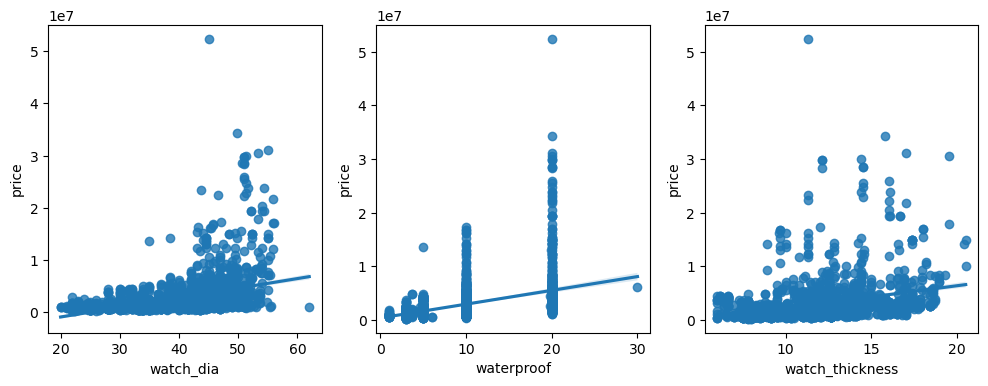

In [46]:
# Biểu đồ Regplot
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i, col in enumerate([x for x in num_cols if x!='price']):
    sns.regplot(data=df, x=col, y='price', ax=ax[i])
plt.show();

### Biểu đồ Tần suất các biến số

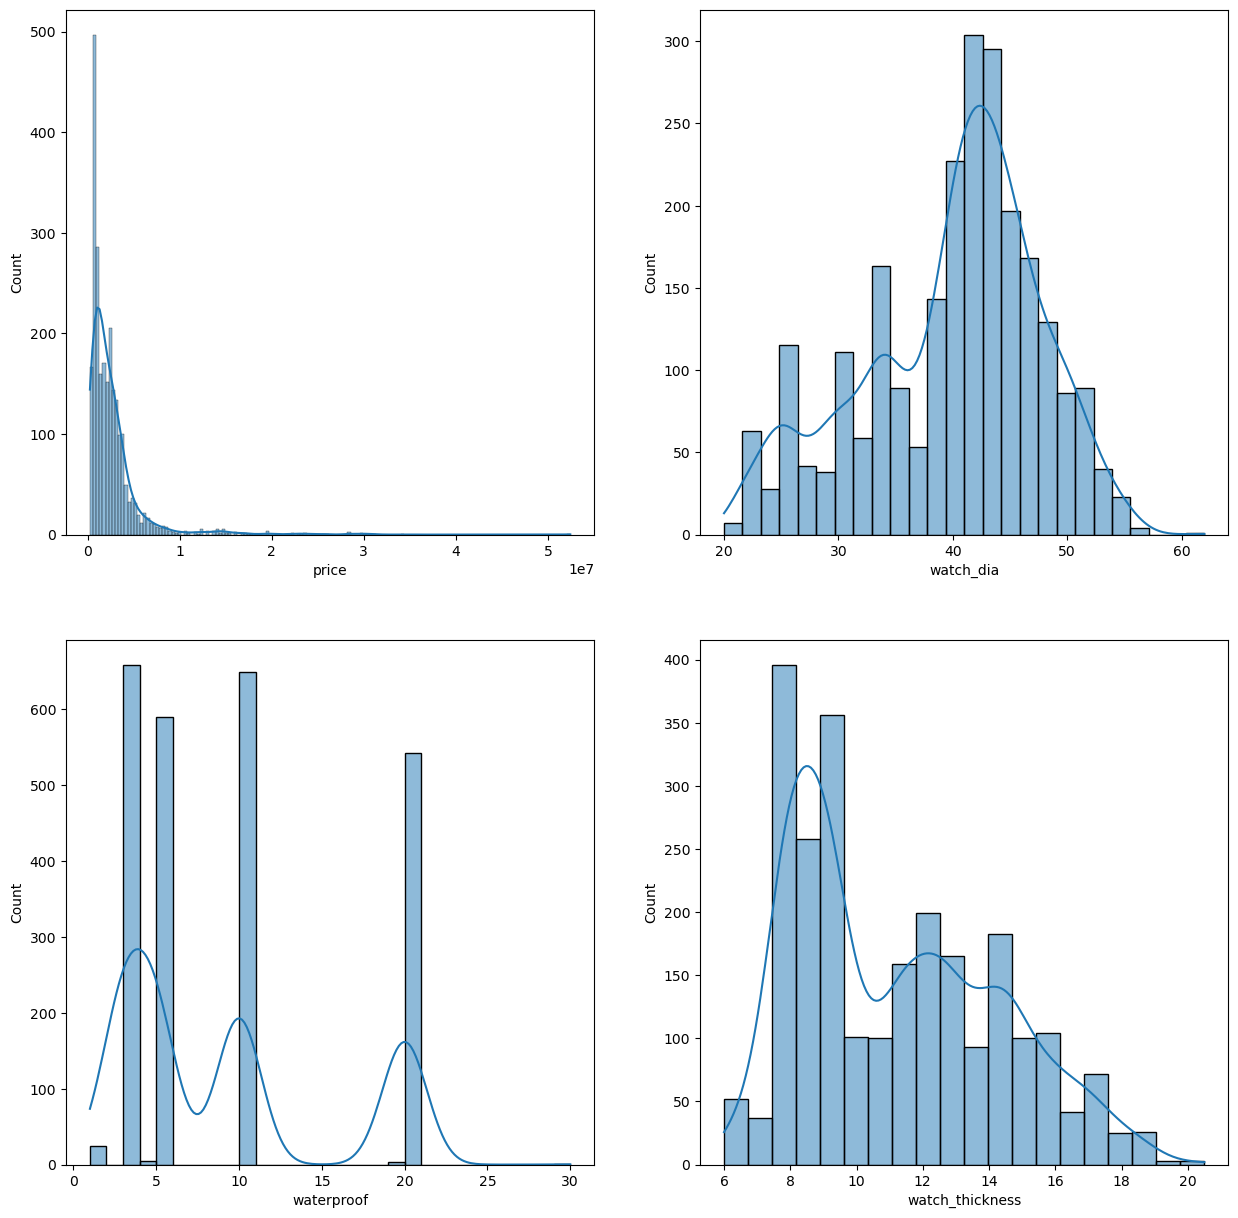

In [47]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(num_cols, start = 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=col, kde=True)

## Biến phân loại

### Độ ảnh hưởng các biến phân loại

In [48]:
from scipy.stats import f_oneway, f

# Ham tinh do anh huong cac bien phan loai den bien target
def DoAnhHuongCacBienPhanLoai(df, target):
    cat_cols = list(df.select_dtypes(['object']).columns)

    alpha = 0.05 # Muc y nghia cua p_value
    f_statistic = [0]*len(cat_cols)
    f_critical = [0]*len(cat_cols)
    p_value = [0]*len(cat_cols)
    check = [False]*len(cat_cols) #  List kết quả biến phân loại có ảnh hưởng đến biến target không (True/False)

    for i, col in enumerate(cat_cols):
        groups = []
        for make, group in df.groupby(col):
            groups.append(group[target])

        dfn = len(df[col].unique()) - 1
        dfd = len(df[col]) - len(df[col].unique())

        f_statistic[i], p_value[i] = f_oneway(*groups)
        f_critical[i] = f.ppf(1 - alpha, dfn, dfd)

        if (p_value[i] < alpha and f_statistic[i] > f_critical[i]):
            check[i] = True

    res = pd.DataFrame({
            "Attribute": cat_cols,
            "F-statistic": f_statistic,
            "F-crtical": f_critical,
            "P-value": p_value,
            "Result": check
        })
    return res

DoAnhHuongCacBienPhanLoai(df, 'price')

,Attribute,F-statistic,F-crtical,P-value,Result
0,watch_name,696.799142,1.177983,8.358210e-290,True
1,watch_type,745.350269,3.845223,1.154280e-143,True
2,user,37.075332,2.608506,1.972651e-23,True
3,glass_material,146.613563,2.217723,1.498274e-136,True
4,bracelet_material,26.977022,2.013289,6.876468e-36,True
5,origin,1.676932,2.608506,1.698526e-01,False
6,website,34.450926,2.999367,1.749661e-15,True
7,watch_shape,6.090262,2.102255,2.406977e-06,True
8,watch_sku,189.130443,1.245461,0.000000e+00,True


### Biểu đồ Boxplot các biến phân loại

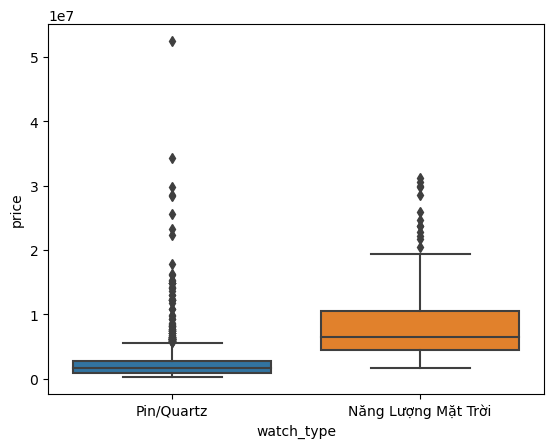

In [49]:
# Biến 'watch_type'
sns.boxplot(data=df, x='watch_type', y='price');

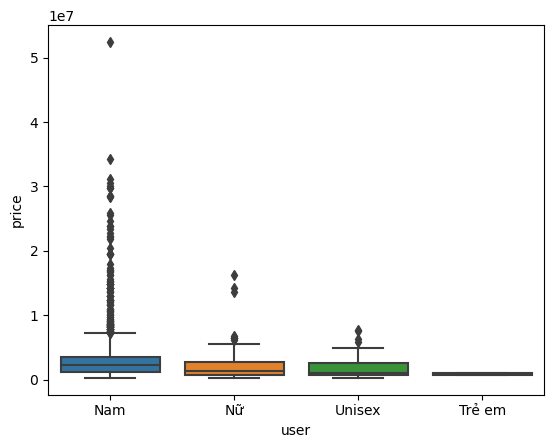

In [50]:
# Biến 'user'
sns.boxplot(data=df, x='user', y='price');

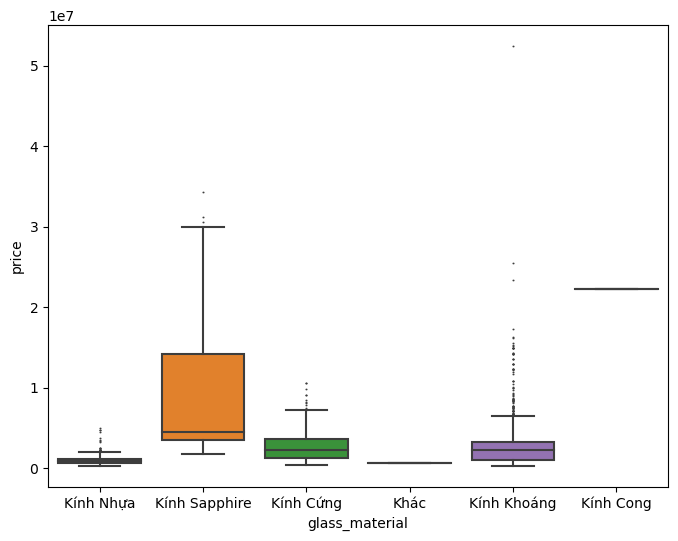

In [51]:
# Biến 'glass_material'
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='glass_material', y='price', fliersize=0.5);

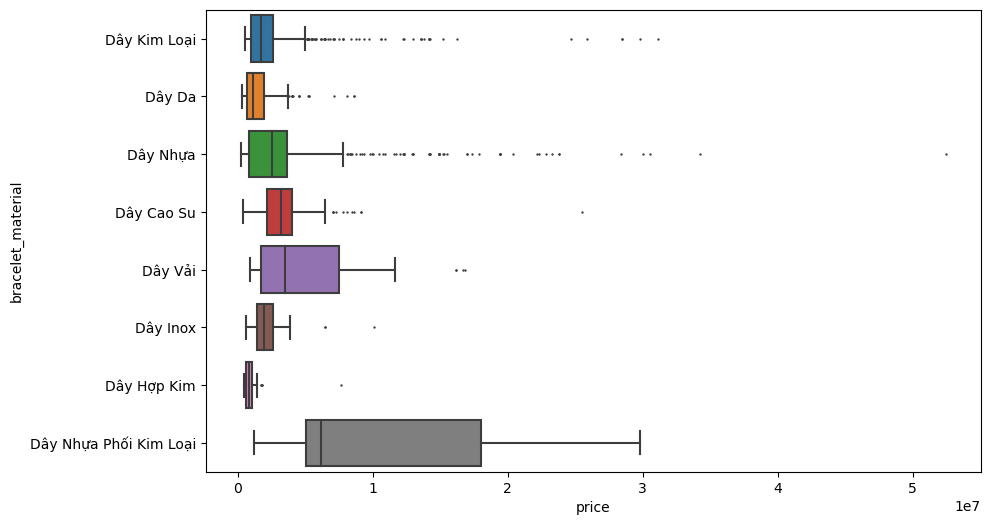

In [52]:
# Biến 'bracelet_material'
plt.figure(figsize=(10,6))
sns.boxplot(data=df, y='bracelet_material', x='price', fliersize=0.8);

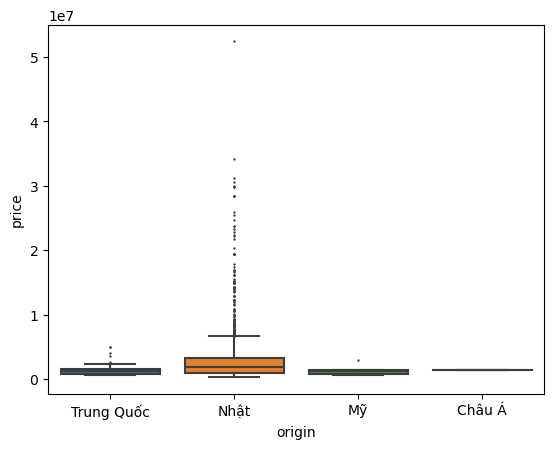

In [53]:
# Biến 'origin'
# plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='origin', y='price', fliersize=0.8);

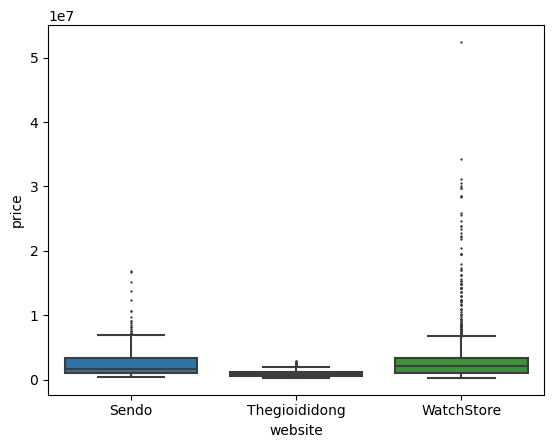

In [54]:
# Biến 'website'
# plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='website', y='price', fliersize=0.8);

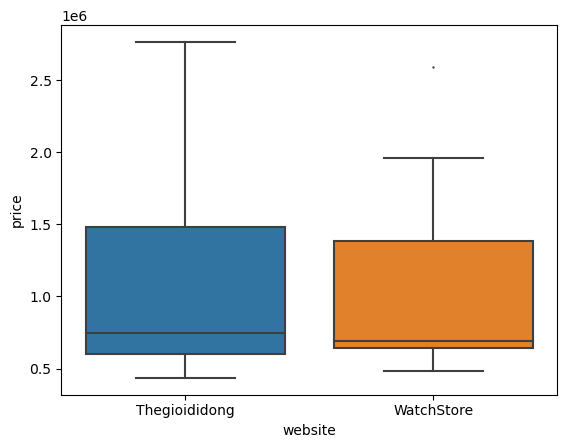

In [55]:
sns.boxplot(data=df_web, x='website', y='price', fliersize=0.8);

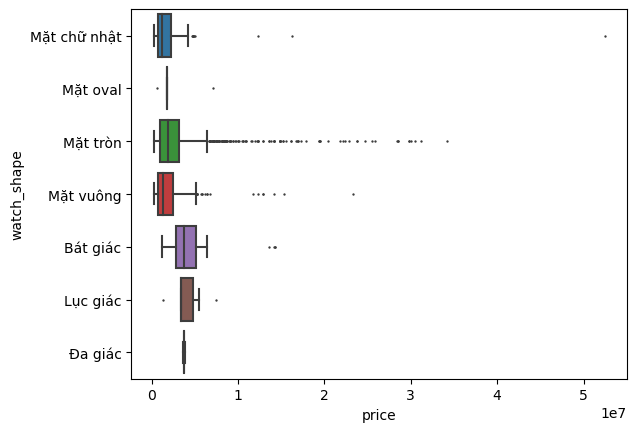

In [56]:
# Biến 'watch_shape'
# plt.figure(figsize=(10,6))
sns.boxplot(data=df, y='watch_shape', x='price', fliersize=0.8);

# Mã hóa dữ liệu

In [57]:
# Chuẩn hóa thuộc tính 'watch_sku'

df.drop('watch_sku', axis=1, inplace=True)

In [58]:
# Loại bỏ thuộc tính 'watch_name', 'origin'
df.drop(['watch_name', 'origin'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

In [59]:
df = df.sample(frac=1)

In [60]:
df_sendo = df[df['website'] == 'Sendo'].drop(['website'], axis=1)
df_tgdd = df[df['website'] == 'Thegioididong'].drop(['website'], axis=1)
df_watchstore = df[df['website'] == 'WatchStore'].drop(['website'], axis=1)

In [61]:
# Mã hóa One-hot Encoding các thuộc tính phân loại
df = pd.get_dummies(df)
df_sendo = pd.get_dummies(df_sendo)
df_tgdd = pd.get_dummies(df_tgdd)
df_watchstore = pd.get_dummies(df_watchstore)

# Huấn luyện và đánh giá mô hình

## Chuẩn bị dữ liệu

In [62]:
X = df.drop(['price'], axis = 1)
y = df['price']

X_sd = df_sendo.drop(['price'], axis = 1)
y_sd = df_sendo['price']

X_tgdd = df_tgdd.drop(['price'], axis = 1)
y_tgdd = df_tgdd['price']

X_ws = df_watchstore.drop(['price'], axis = 1)
y_ws = df_watchstore['price']

## Xây dựng mô hình

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

def model(X, y, model, degree, cv=5):
  # Chia tập train và test
  # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  Input = [ #('scale', StandardScaler()),
           ('polynomial', PolynomialFeatures(degree=degree, include_bias=True)),
           ('model', model)]
  
  pipeline = Pipeline(Input)

  # Huấn luyện mô hình kết hợp kiểm định chéo
  # pipeline.fit(X_train, y_train)
  cvs = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error')

  # Trả ra kết quả dự đoán
  # y_pred = pipeline.predict(X_test)
  y_pred = cross_val_predict(pipeline, X, y, cv=cv)
  
  # Trả ra độ đo R2 để kiểm tra sai lệch giữa kết quả dự đoán và thực tế của mô hình
  print('MSE: ', mse(y, y_pred))
  print('R2-score: ', r2(y, y_pred))

  return y_pred

## Huấn luyện và đánh giá

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import xgboost as xgb

### 3 website

In [65]:
lr = LinearRegression()
y_lr = model(X, y, lr, 1, 5)

ridge = Ridge()
y_ridge = model(X, y, ridge, 1, 5)

xgbr = xgb.XGBRegressor()
y_xgbr = model(X, y, xgbr, 1, 5)

MSE:  5891525324030.034
R2-score:  0.49807406088686834
MSE:  5871587211289.043
R2-score:  0.49977267973534334
MSE:  4029827428328.4214
R2-score:  0.6566806038874818


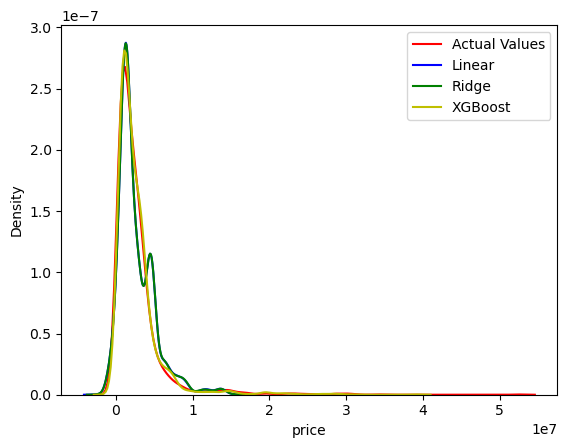

In [66]:
# Vẽ distplot để trực quan kết quả mô hình dự đoán được
ax1 = sns.distplot(y, hist=False, color='r', label='Actual Values')
sns.distplot(y_lr, hist=False, color='b', label='Linear', ax=ax1)
sns.distplot(y_ridge, hist=False, color='g', label='Ridge', ax=ax1)
sns.distplot(y_xgbr, hist=False, color='y', label='XGBoost', ax=ax1)
ax1.legend();

### Website Sendo

In [67]:
lr_sd = LinearRegression()
y_lr_sd = model(X_sd, y_sd, lr_sd, 1, 5)

ridge_sd = Ridge()
y_ridge_sd = model(X_sd, y_sd, ridge_sd, 1, 5)

xgbr_sd = xgb.XGBRegressor()
y_xgbr_sd = model(X_sd, y_sd, xgbr_sd, 1, 5)

MSE:  2457569611966.0176
R2-score:  0.6040507501730294
MSE:  2350646913682.9736
R2-score:  0.6212775102894108
MSE:  992556481039.0033
R2-score:  0.8400851018971156


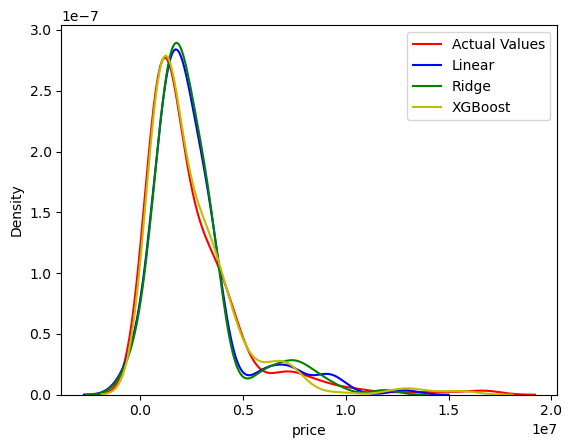

In [68]:
# Vẽ distplot để trực quan kết quả mô hình dự đoán được
ax1 = sns.distplot(y_sd, hist=False, color='r', label='Actual Values')
sns.distplot(y_lr_sd, hist=False, color='b', label='Linear', ax=ax1)
sns.distplot(y_ridge_sd, hist=False, color='g', label='Ridge', ax=ax1)
sns.distplot(y_xgbr_sd, hist=False, color='y', label='XGBoost', ax=ax1)
ax1.legend();

### Thegioididong

In [69]:
lr_tgdd = LinearRegression()
y_lr_tgdd = model(X_tgdd, y_tgdd, lr_tgdd, 1, 5)

ridge_tgdd = Ridge()
y_ridge_tgdd = model(X_tgdd, y_tgdd, ridge_tgdd, 1, 5)

xgbr_tgdd = xgb.XGBRegressor()
y_xgbr_tgdd = model(X_tgdd, y_tgdd, xgbr_tgdd, 1, 5)

MSE:  153302838985.61026
R2-score:  0.4508140239194762
MSE:  153106440550.6474
R2-score:  0.4515175938397691
MSE:  104674849248.08257
R2-score:  0.6250169948856211


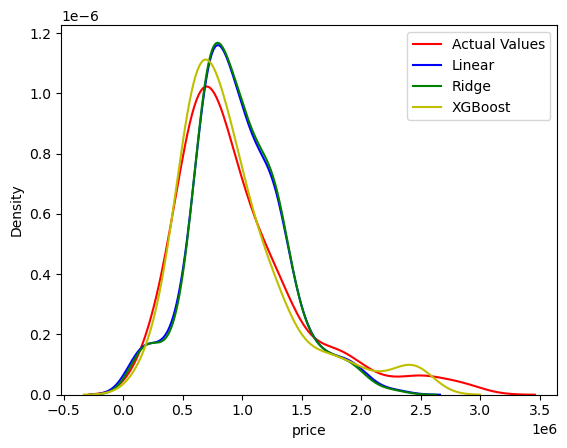

In [70]:
# Vẽ distplot để trực quan kết quả mô hình dự đoán được
ax1 = sns.distplot(y_tgdd, hist=False, color='r', label='Actual Values')
sns.distplot(y_lr_tgdd, hist=False, color='b', label='Linear', ax=ax1)
sns.distplot(y_ridge_tgdd, hist=False, color='g', label='Ridge', ax=ax1)
sns.distplot(y_xgbr_tgdd, hist=False, color='y', label='XGBoost', ax=ax1)
ax1.legend();

### WatchStore

In [71]:
lr_ws = LinearRegression()
y_lr_ws = model(X_ws, y_ws, lr_ws, 1, 5)

ridge_ws = Ridge()
y_ridge_ws = model(X_ws, y_ws, ridge_ws, 1, 5)

xgbr_ws = xgb.XGBRegressor()
y_xgbr_ws = model(X_ws, y_ws, xgbr_ws, 1, 5)

MSE:  7122841867909.169
R2-score:  0.47728434507667494
MSE:  7103979051693.49
R2-score:  0.47866860848090675
MSE:  4342629533477.1597
R2-score:  0.6813125318831192


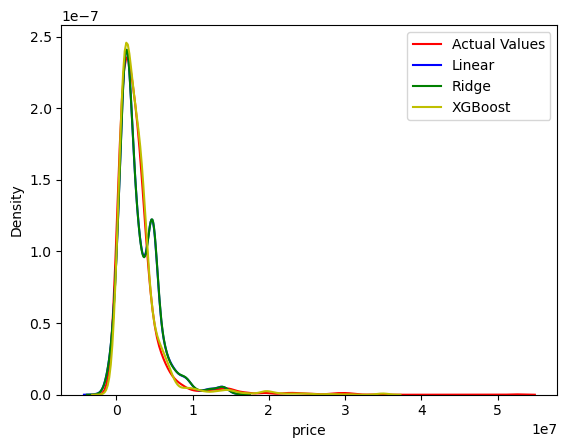

In [72]:
# Vẽ distplot để trực quan kết quả mô hình dự đoán được
ax1 = sns.distplot(y_ws, hist=False, color='r', label='Actual Values')
sns.distplot(y_lr_ws, hist=False, color='b', label='Linear', ax=ax1)
sns.distplot(y_ridge_ws, hist=False, color='g', label='Ridge', ax=ax1)
sns.distplot(y_xgbr_ws, hist=False, color='y', label='XGBoost', ax=ax1)
ax1.legend();